In [2]:
import json
import glob
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
def visualize_single(address):
    with open(address,'r') as f:
        results=json.load(f)
    history=pd.DataFrame.from_dict(results['history'])

    # fig_loss = px.line(history, x='epoch', y='train_loss', title=f'Loss vs Time for {results["name"]}',
    #                 labels={'Loss': 'Loss', 'Time': 'Time (seconds)'},
    #                 markers=True)
    # fig_loss.update_layout(
    #     title_font_size=20,
    #     title_x=0.5,
    #     # plot_bgcolor='white',
    #     xaxis=dict(title='Time (s)'),
    #     yaxis=dict(title='Loss'),
    # )
    # fig_loss.update_traces(marker=dict(size=5))
    # fig_loss.show()
    # fig_loss.write_image(f'loss_{results["name"]}.pdf')

    # # Plot for Perplexity vs Time
    # fig_perplexity = px.line(history, x='epoch', y='test_perplexity', title=f'Perplexity vs Time for {results["name"]}',
    #                         labels={'Perplexity': 'Perplexity', 'Time': 'Time (seconds)'},
    #                         markers=True)
    # fig_perplexity.update_layout(
    #     title_font_size=20,
    #     title_x=0.5,
    #     # plot_bgcolor='white',
    #     xaxis=dict(title='Time (s)'),
    #     yaxis=dict(title='Perplexity', type='log'),
    # )
    # fig_loss.update_traces(marker=dict(size=5))
    # fig_perplexity.show()
    # fig_loss.write_image(f'perplexity_{results["name"]}.pdf')
    

    # Assuming 'history' is a DataFrame with columns 'epoch', 'train_loss', and 'test_perplexity'

    # Plot for Loss vs Time
    plt.figure(figsize=(10, 6))
    plt.plot(history['epoch'], history['train_loss'], marker='o', label='Train Loss')
    plt.title(f'Loss vs Time for {results["name"]}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.savefig(f'loss_{results["name"]}.pdf')
    plt.show()

    # Plot for Perplexity vs Time
    plt.figure(figsize=(10, 6))
    plt.plot(history['epoch'], history['test_perplexity'], marker='o', label='Test Perplexity')
    plt.title(f'Perplexity vs Time for {results["name"]}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Perplexity')
    plt.yscale('log')  # Setting y-axis to logarithmic scale for perplexity
    plt.grid(True)
    plt.savefig(f'perplexity_{results["name"]}.pdf')
    plt.show()

    return pd.DataFrame({key:[results[key]] for key in results.keys() if key !='history'})




def visualize_bulk(addresses):
    results=[]
    for address in addresses:
        results.append(visualize_single(address))
    return pd.concat(results,axis=0)

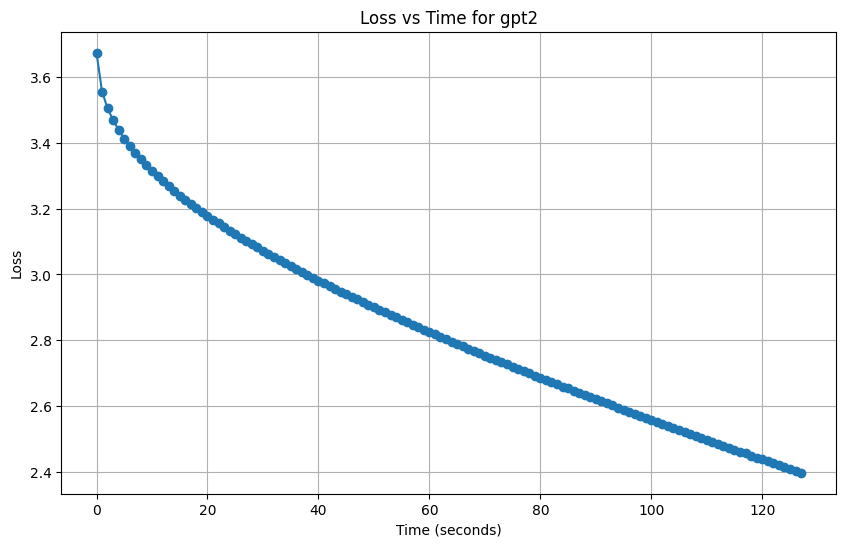

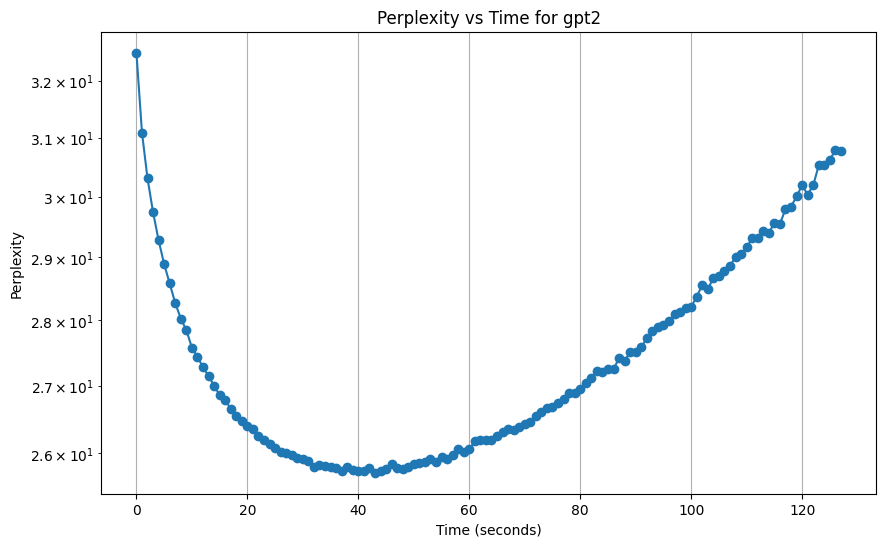

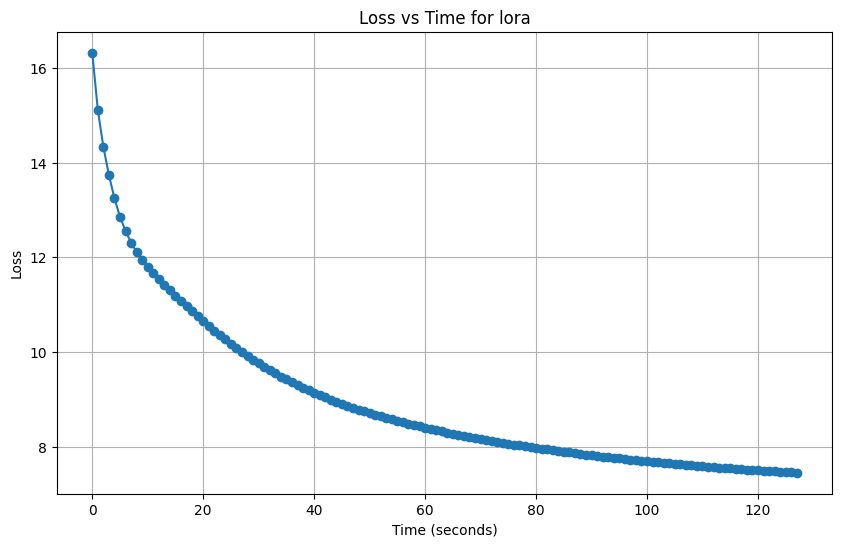

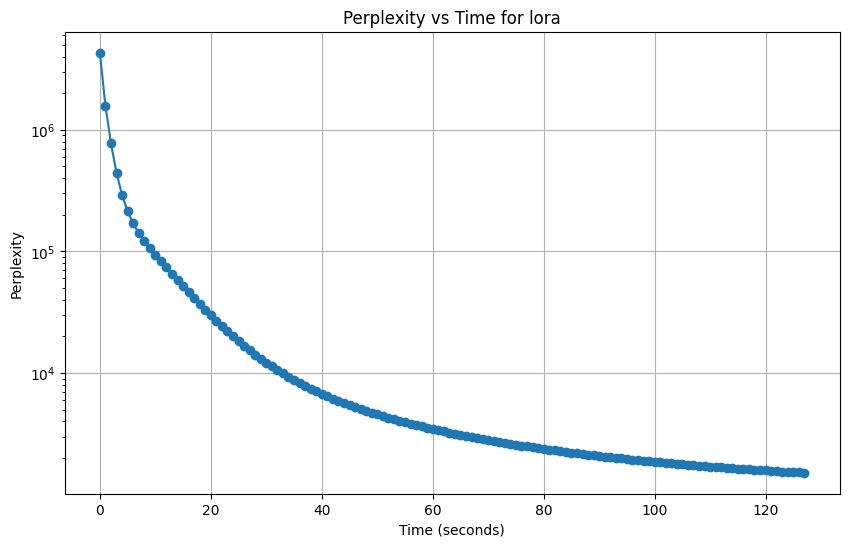

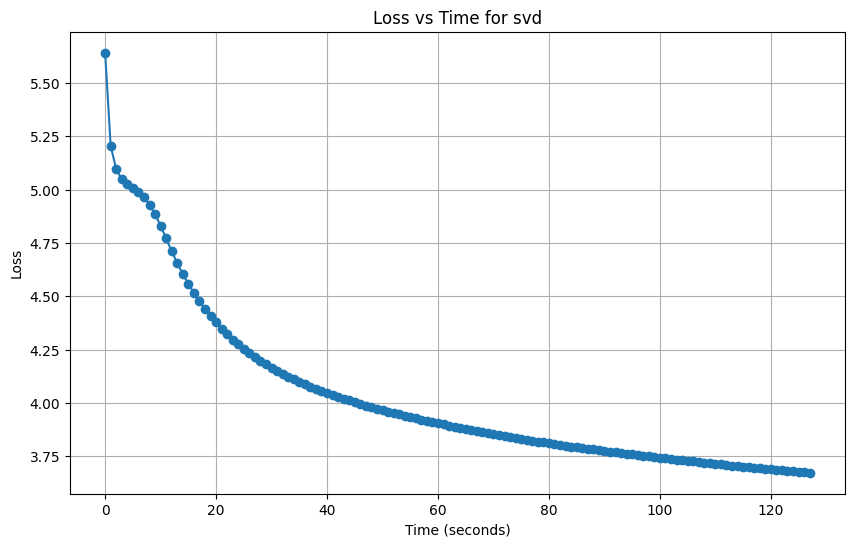

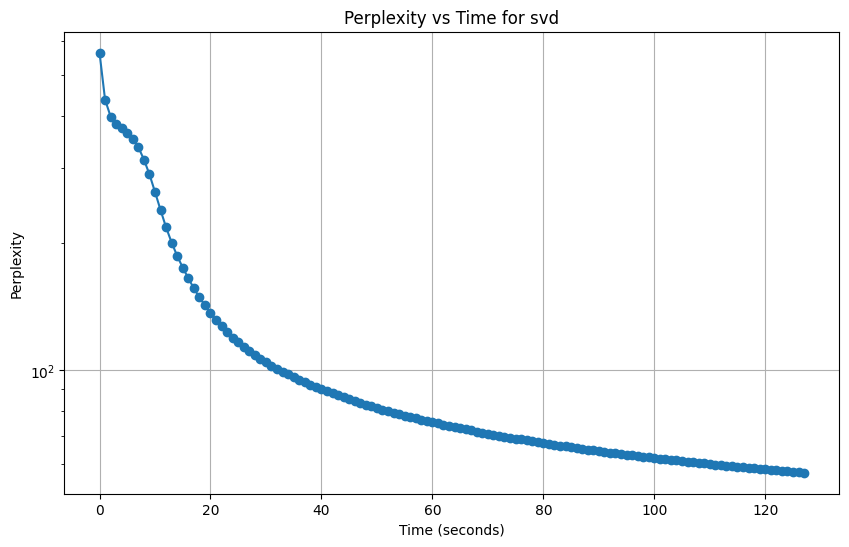

,name,model_size,trainable_params,all_params,cpu_inference_time,gpu_inference_time,base_perplexity,training_time,after_train_perplexity
0,gpt2,486814090,124439808,124439808,1.520179,0.014061,4.020892e+01,0.674721,30.764640
0,lora,504722698,5166336,129158400,1.890016,0.014486,2.959513e+07,0.464116,1512.763551
0,svd,172152682,42159360,44223744,0.704575,0.011825,3.171732e+03,0.368243,57.196423


In [4]:
addresses=glob.glob('../results/*.json')
visualize_bulk(addresses)